In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns+100
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',27)# show all columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.preprocessing import OneHotEncoder
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns+100
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',27)# show all columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.preprocessing import OneHotEncoder
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist # Pairwise distribution between data points
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import datasets  # load datasets in from online

Clustering is a machine learning and data analysis technique used to group similar data points together based on certain criteria or features. There are several types of clustering algorithms, each with its own approach and characteristics. Here are some common types of clustering:

K-Means Clustering: K-means is one of the most popular clustering algorithms. It partitions data into 'k' clusters where each data point belongs to the cluster with the nearest mean. It's a centroid-based clustering algorithm.

Hierarchical Clustering: This method creates a tree-like structure of clusters by repeatedly merging or splitting existing clusters. It can be agglomerative (bottom-up) or divisive (top-down).

Density-Based Clustering: Density-based clustering algorithms, such as DBSCAN (Density-Based Spatial Clustering of Applications with Noise), group data points based on their density. Clusters are regions with high point density separated by areas of lower density.

Mean Shift Clustering: Mean Shift is a non-parametric clustering algorithm that doesn't require specifying the number of clusters in advance. It moves points towards the mode (peak) of the data distribution to find clusters.

Gaussian Mixture Models (GMM): GMM assumes that the data points are generated from a mixture of several Gaussian distributions. It models clusters as probability distributions and assigns data points to the most likely cluster based on the probability.

Agglomerative Clustering: Agglomerative clustering starts with individual data points as clusters and recursively merges the closest clusters until a termination criterion is met. It is a bottom-up hierarchical clustering approach.

Fuzzy Clustering: Fuzzy clustering, like Fuzzy C-Means (FCM), allows data points to belong to multiple clusters with varying degrees of membership. It assigns probabilities to data points being in different clusters.

Self-Organizing Maps (SOM): SOM is a type of neural network-based clustering that maps high-dimensional data into a lower-dimensional grid of nodes, where each node represents a cluster prototype.

BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies): BIRCH is a hierarchical clustering algorithm designed for large datasets. It creates a tree-like structure of clusters and is memory-efficient.

OPTICS (Ordering Points To Identify the Clustering Structure): OPTICS is an extension of DBSCAN that produces a reachability plot, which can reveal the density-based clustering structure of the data.

Affinity Propagation: Affinity Propagation finds clusters by considering all data points as potential exemplars and iteratively updating exemplar assignments based on similarity measurements.

Spectral Clustering: Spectral clustering techniques use the eigenvalues and eigenvectors of a similarity matrix to partition data into clusters. It is particularly effective for data with complex geometric shapes.

Agglomerative Hierarchical Clustering with Dendrogram: This is a visual representation of the hierarchical clustering process, where a tree-like structure (dendrogram) shows how clusters are merged or split at each step.

Each type of clustering algorithm has its strengths and weaknesses and is suited to different types of data and problem domains. The choice of clustering algorithm depends on the specific characteristics of the data and the objectives of the analysis.






# 3 Type Of Clustering
# 1.Hirarchical Based
# 2.Density Based
# 3.Partition Based

# insignaficant columns

In [8]:
df=pd.read_csv('customer.csv')
df.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [9]:
df.shape

(200, 5)

In [10]:
from pylab import rcParams
rcParams['figure.figsize']=8,6

In [11]:
df.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [12]:
df=df.drop('Cust_Number',axis=1)

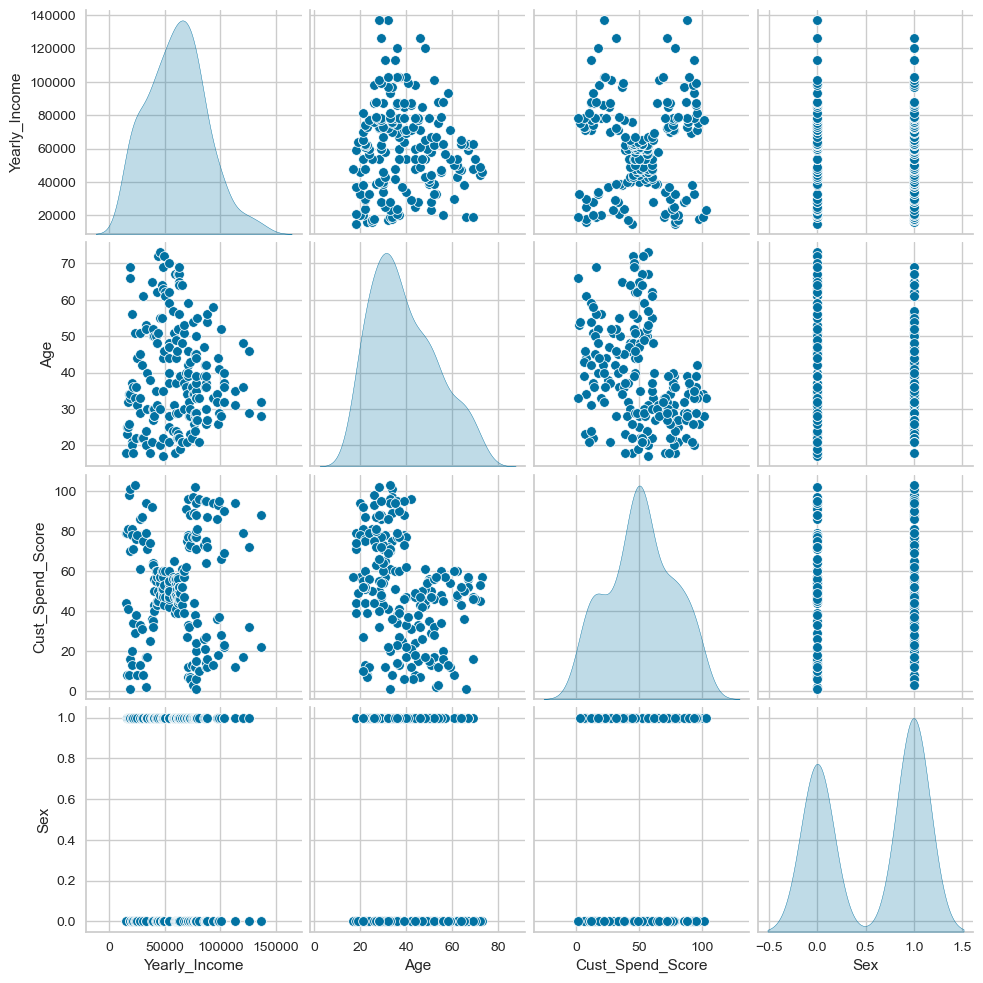

In [13]:
sns.pairplot(df,diag_kind='kde')
plt.show()

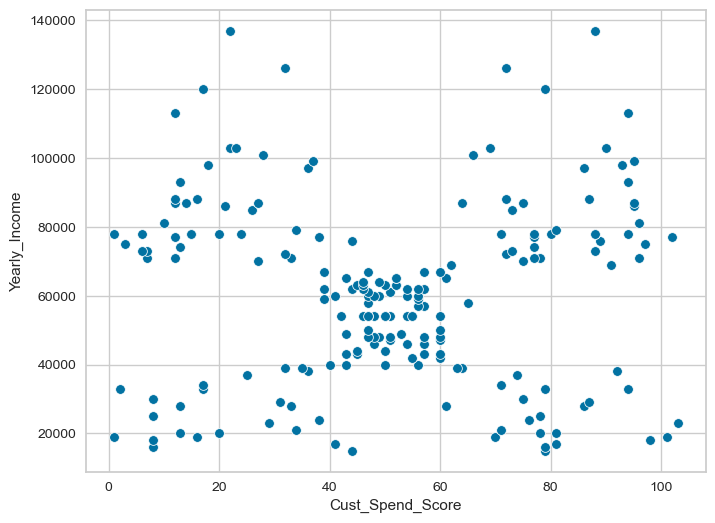

In [14]:
sns.scatterplot(data=df ,x='Cust_Spend_Score',y='Yearly_Income')
plt.show()

# Filter the requared features

In [15]:
df_flt=df[['Yearly_Income','Cust_Spend_Score']]

# Lets Scaled The Data

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [17]:
df_scale=sc.fit_transform(df_flt)

In [18]:
df_scale

array([[-1.73899919, -0.28418148],
       [-1.73899919,  1.06356268],
       [-1.70082976, -1.67043263],
       [-1.70082976,  1.06356268],
       [-1.66266033, -0.39970241],
       [-1.66266033,  1.14057663],
       [-1.62449091, -1.67043263],
       [-1.62449091,  1.79519523],
       [-1.58632148, -1.93998146],
       [-1.58632148,  0.7169999 ],
       [-1.58632148, -1.36237682],
       [-1.58632148,  1.91071616],
       [-1.54815205, -1.20834891],
       [-1.54815205,  1.14057663],
       [-1.54815205, -1.47789774],
       [-1.54815205,  1.02505571],
       [-1.50998262, -0.66925125],
       [-1.50998262,  0.75550687],
       [-1.43364376, -0.86178613],
       [-1.43364376,  1.98773011],
       [-1.39547433, -0.51522334],
       [-1.39547433,  0.94804175],
       [-1.3573049 , -1.67043263],
       [-1.3573049 ,  1.02505571],
       [-1.24279661, -1.47789774],
       [-1.24279661,  1.33311151],
       [-1.24279661, -0.70775822],
       [-1.24279661,  0.37043711],
       [-1.20462718,

In [19]:
df_sf=pd.DataFrame(df_scale,columns=df_flt.columns)
df_sf.head()

,Yearly_Income,Cust_Spend_Score
0,-1.738999,-0.284181
1,-1.738999,1.063563
2,-1.700830,-1.670433
3,-1.700830,1.063563
4,-1.662660,-0.399702


# Build The Model

# k-mean 

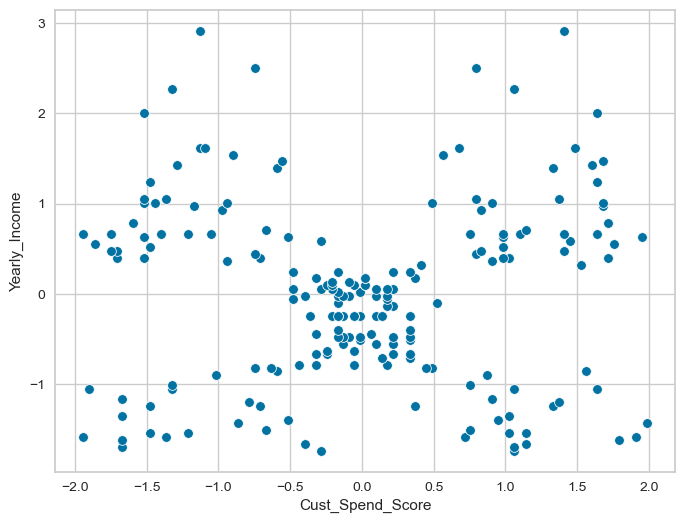

In [20]:
sns.scatterplot(data=df_sf,x='Cust_Spend_Score',y='Yearly_Income')
plt.show()

# k-means clustering

In [21]:
kmns=KMeans(n_clusters=5,random_state=10)
kmns.fit(df_sf)

KMeans(n_clusters=5, random_state=10)

In [22]:
print(kmns.cluster_centers_)   # return the cluster centers.they are the coordinates of the cetroied

[[ 1.02054738 -1.24685589]
 [-0.22414997 -0.00693126]
 [-1.30751869 -1.12631231]
 [-1.35366972  1.16441429]
 [ 0.99158305  1.23437568]]


In [23]:
print(kmns.labels_) # labels coresponds to every row of the dataset .labels are 0.1.2.3.4

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 1 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


In [24]:
print(kmns.inertia_)            # withine summ of square
print('number of iteration=',kmns.n_iter_)# this gives the number of interation performs before kmeans converge
print('max no of interation',kmns.max_iter)# this gives the maximum numbers of interation allowed.defult is 3000
print('number of cluster',kmns.n_clusters)# give the numbers of cluesters

66.69647392440947
number of iteration= 6
max no of interation 300
number of cluster 5


In [25]:
means_k=kmns.fit_predict(df_sf)  # fit predict returns only the labels
means_k

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

Concatinate the labels to the orignal dataset

In [26]:
df_sf.head()

,Yearly_Income,Cust_Spend_Score
0,-1.738999,-0.284181
1,-1.738999,1.063563
2,-1.700830,-1.670433
3,-1.700830,1.063563
4,-1.662660,-0.399702


In [27]:
kmns.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

In [28]:
df_final=df_sf.copy()

In [29]:
df_final['group']=means_k

In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Yearly_Income     200 non-null    float64
 1   Cust_Spend_Score  200 non-null    float64
 2   group             200 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 4.0 KB


<Figure size 2000x1500 with 0 Axes>

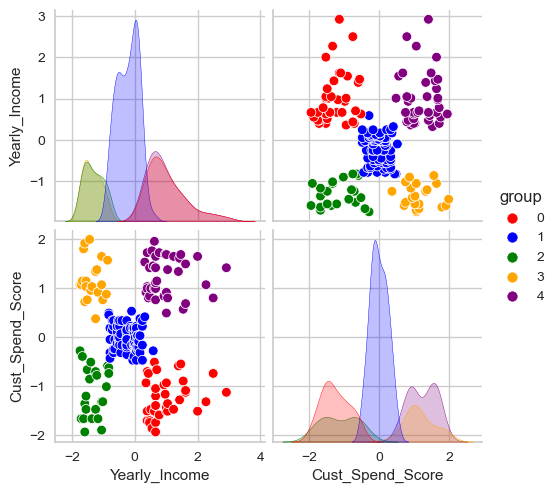

In [31]:
plt.figure(figsize=(20,15))
sns.pairplot(df_final,diag_kind='kde',hue='group',palette=['red','blue','green','orange','purple'])
plt.show()

In [32]:
cluster_range=range(1,15)
wcss=[]
cluster_sil_score=[]

for i in range(1,21):
    kmeans=KMeans(n_clusters= i,random_state=10)
    kmeans.fit(df_sf)
    wcss.append(kmeans.inertia_)

In [33]:
wcss   # Within-Cluster Sum of Squares.

[400.0,
 270.00076648257095,
 158.57318648271084,
 110.00511756050398,
 66.69647392440947,
 56.01623226605581,
 45.54724874614021,
 38.26405274021606,
 33.605392024633716,
 30.044493082188012,
 27.129677753121847,
 25.086366447369848,
 22.55170208018169,
 20.346186179827534,
 19.48591205490559,
 17.080821550023842,
 15.485381552719371,
 14.958740084658757,
 13.28115151955582,
 12.914028651674599]

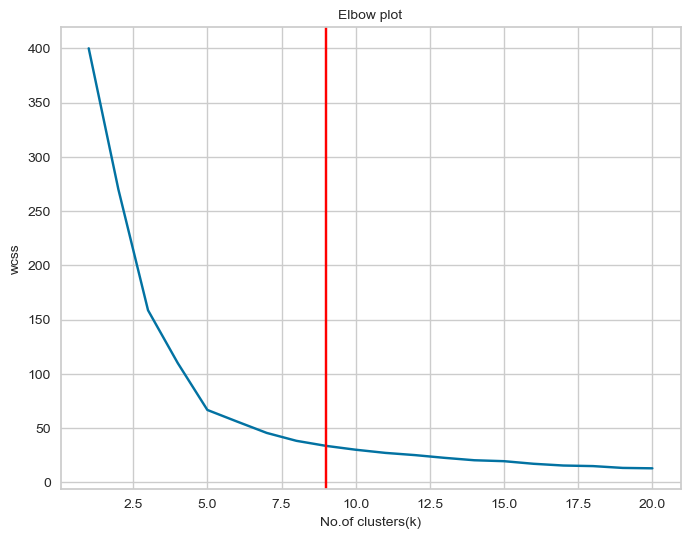

In [34]:
plt.plot(range(1,21),wcss)
plt.title('Elbow plot',fontsize=10)
plt.xlabel('No.of clusters(k)',fontsize=10)
plt.ylabel('wcss',fontsize=10)
plt.axvline(x=9,color='red')
plt.show()

# Optimal Value Of K Using Silhouette Score

In [36]:
n_clusters=[2,3,4,5,6,7,8,9,10]
for k in n_clusters:
    cluster=KMeans (n_clusters=k,random_state=10)
    predict=cluster.fit_predict(df_sf)
    score=silhouette_score(df_sf,predict,random_state=10)
    print('For {} clusters the silhouette score is {}'.format(k,score))

For 2 clusters the silhouette score is 0.3591615413756785
For 3 clusters the silhouette score is 0.4655232553320422
For 4 clusters the silhouette score is 0.4953283597895246
For 5 clusters the silhouette score is 0.5520621436364275
For 6 clusters the silhouette score is 0.5400545310397922
For 7 clusters the silhouette score is 0.5284109639624426
For 8 clusters the silhouette score is 0.45432141512061947
For 9 clusters the silhouette score is 0.4498611116847907
For 10 clusters the silhouette score is 0.4450347176072097


# Day 2

In [37]:
#!pip install yellowbrick

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples

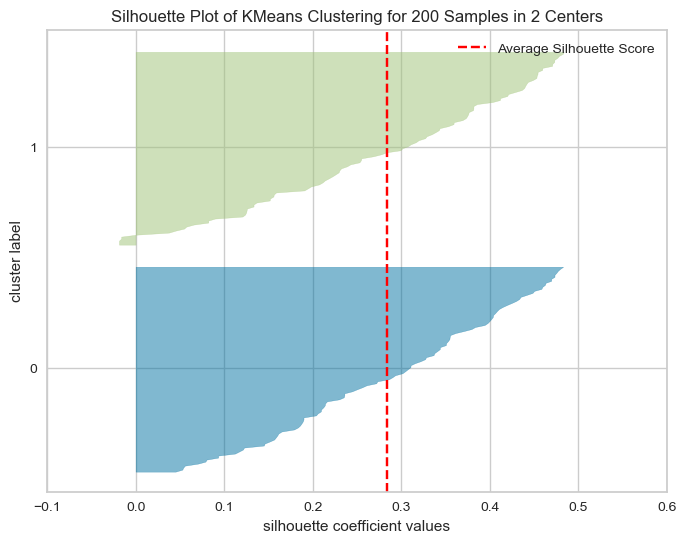

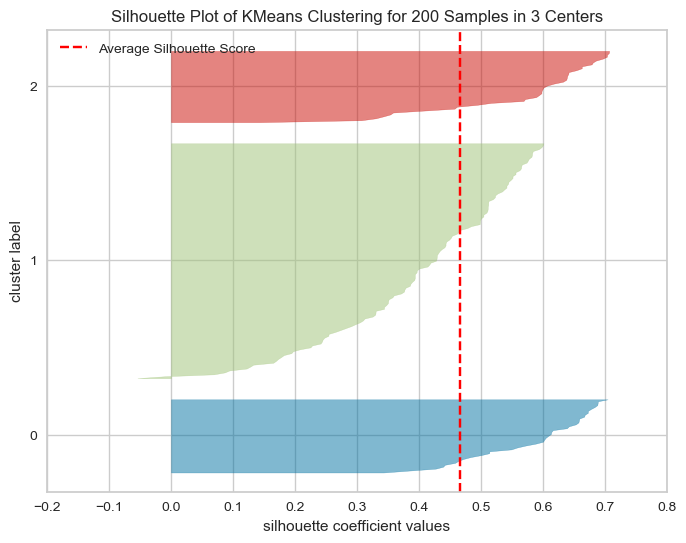

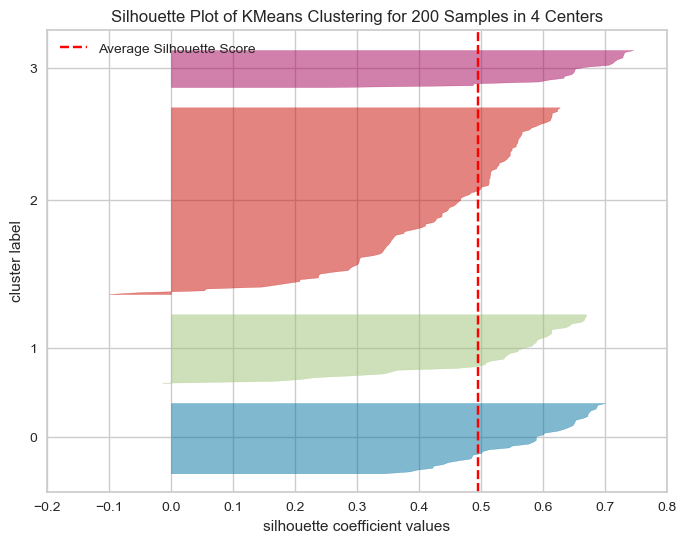

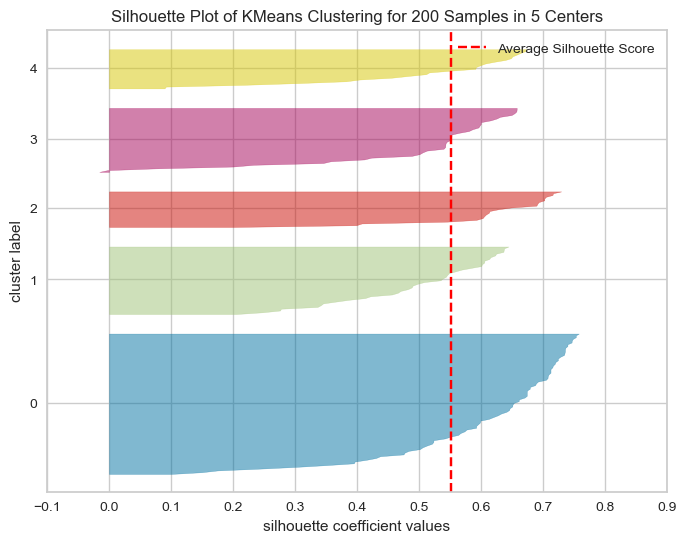

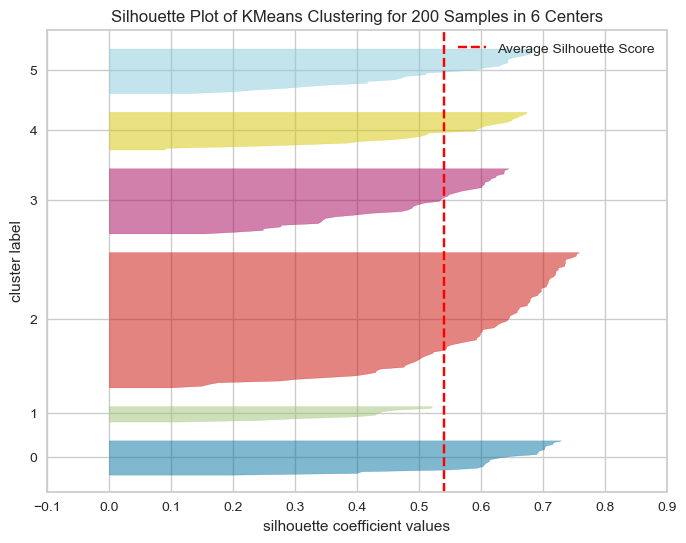

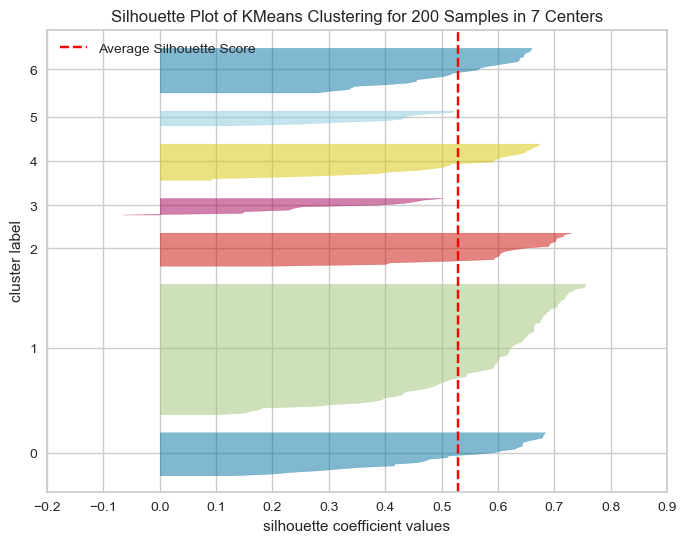

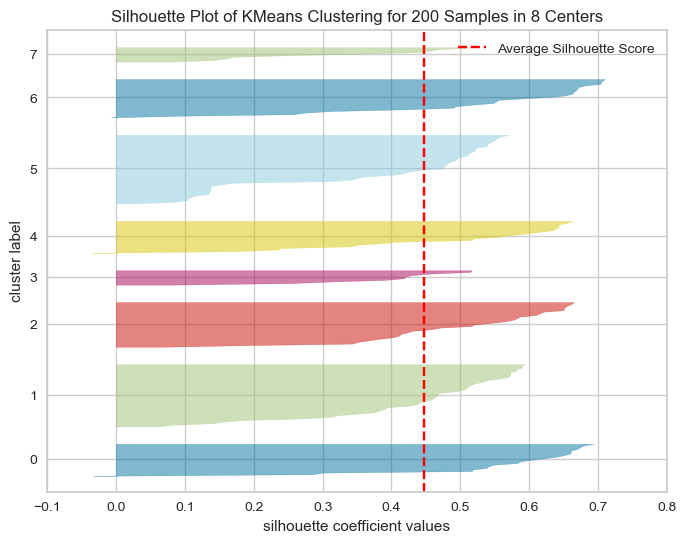

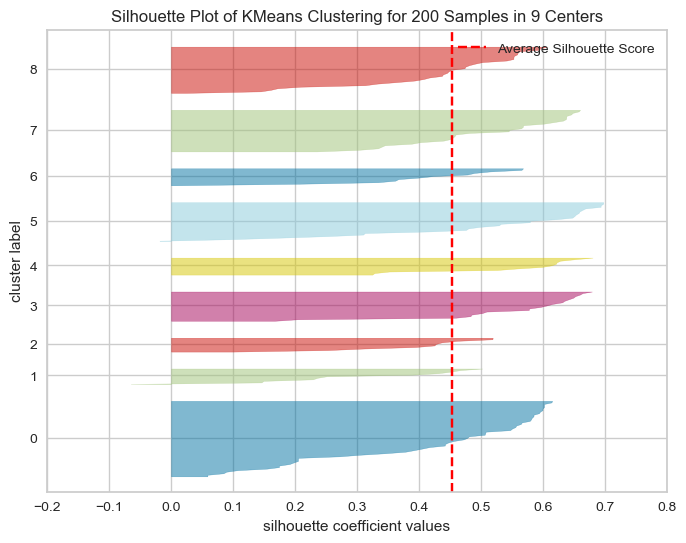

In [39]:
for i in range(2,10):
    kms=KMeans(n_clusters=i)
    kms.fit(df_sf)
    model=KMeans(n_clusters=i,random_state=42)
    visualizer=SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(df_sf)  # fit the data to the visualizer# below red line is fit and Above red lin is unfit 
    visualizer.show()  # Finlize and render the figure

# Visualize Analysis Of cluster

<Axes: xlabel='group', ylabel='Cust_Spend_Score'>

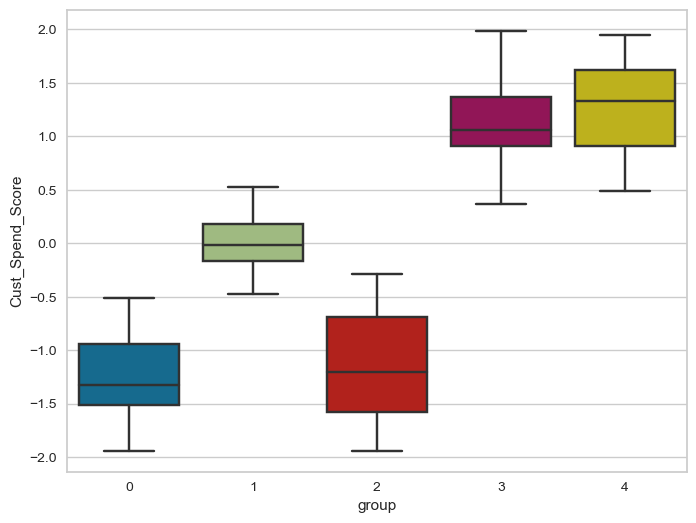

In [40]:
sns.boxplot(data=df_final,x='group',y='Cust_Spend_Score')

<Axes: xlabel='group', ylabel='Cust_Spend_Score'>

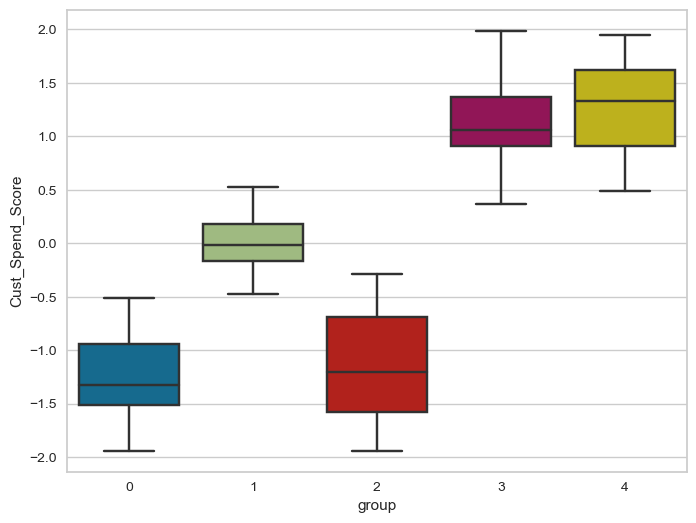

In [41]:
sns.boxplot(x=df_final['group'],y=df_final['Cust_Spend_Score'])

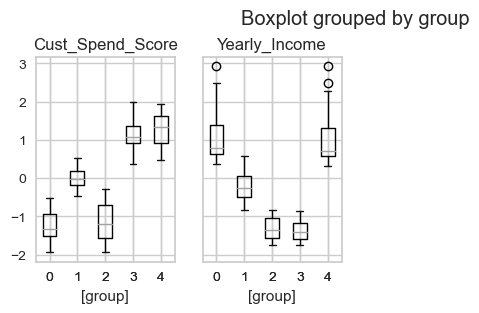

In [43]:
df_final.boxplot(by='group',layout=(2,4))  # 0 over laping and 3,4
plt.show()

# Which plot show how many cluster
# 1.scatterplot=5
# 2.pairplot=3 to 12
# 3.Elbowplot=5
# 4.Silhouetteplot=5,6,9
# 5.Boxplot=5
Business

# Build the clustering the data

In [44]:
df_CustSpend=df.copy()
df_CustSpend.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex
0,15000,18,44,0
1,15000,18,79,0
2,16000,23,8,1
3,16000,25,79,1
4,17000,32,41,1


In [45]:
df_CustSpend['Cluster']=df_final['group'].copy()
df_CustSpend.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex,Cluster
0,15000,18,44,0,2
1,15000,18,79,0,3
2,16000,23,8,1,2
3,16000,25,79,1,3
4,17000,32,41,1,2


# Clusters 0 To 4  means 5 cluster

In [46]:
len(df_CustSpend[df_CustSpend['Cluster']==0])  # size of cluster 1

37

In [47]:
df_CustSpend[df_CustSpend.Cluster==0].describe()  # 0  # cluster 39

,Yearly_Income,Age,Cust_Spend_Score,Sex,Cluster
count,37.000000,37.000000,37.000000,37.000000,37.0
mean,87297.297297,40.567568,19.000000,0.459459,0.0
std,16390.825457,10.712248,10.178954,0.505228,0.0
min,70000.000000,21.000000,1.000000,0.000000,0.0
25%,77000.000000,33.000000,12.000000,0.000000,0.0
50%,81000.000000,42.000000,17.000000,0.000000,0.0
75%,97000.000000,47.000000,27.000000,1.000000,0.0
max,137000.000000,59.000000,38.000000,1.000000,0.0


In [48]:
df_CustSpend[df_CustSpend.Cluster==1].describe()   # 1 # cluster 80

,Yearly_Income,Age,Cust_Spend_Score,Sex,Cluster
count,80.00000,80.000000,80.000000,80.000000,80.0
mean,54687.50000,43.387500,51.200000,0.600000,1.0
std,8839.77454,16.593802,6.404903,0.492989,0.0
min,39000.00000,17.000000,39.000000,0.000000,1.0
25%,47750.00000,28.750000,47.000000,0.000000,1.0
50%,54000.00000,45.000000,51.000000,1.000000,1.0
75%,62000.00000,56.250000,56.000000,1.000000,1.0
max,76000.00000,73.000000,65.000000,1.000000,1.0


In [50]:
df_CustSpend[df_CustSpend.Cluster==2].describe()  # 23 cluster

,Yearly_Income,Age,Cust_Spend_Score,Sex,Cluster
count,23.000000,23.000000,23.000000,23.000000,23.0
mean,26304.347826,45.695652,22.130435,0.608696,2.0
std,7893.811055,13.237120,13.222929,0.499011,0.0
min,15000.000000,18.000000,1.000000,0.000000,2.0
25%,19500.000000,36.500000,10.500000,0.000000,2.0
50%,25000.000000,45.000000,20.000000,1.000000,2.0
75%,33000.000000,52.500000,33.500000,1.000000,2.0
max,39000.000000,69.000000,44.000000,1.000000,2.0


In [52]:
df_CustSpend[df_CustSpend.Cluster==3].describe()# 21 cluster

,Yearly_Income,Age,Cust_Spend_Score,Sex,Cluster
count,21.000000,21.00000,21.000000,21.000000,21.0
mean,25095.238095,25.00000,81.619048,0.571429,3.0
std,7133.756107,5.51362,10.901726,0.507093,0.0
min,15000.000000,18.00000,61.000000,0.000000,3.0
25%,19000.000000,21.00000,75.000000,0.000000,3.0
50%,24000.000000,24.00000,79.000000,1.000000,3.0
75%,30000.000000,30.00000,87.000000,1.000000,3.0
max,38000.000000,34.00000,103.000000,1.000000,3.0


In [54]:
df_CustSpend[df_CustSpend.Cluster==4].describe()  # 39 cluster

,Yearly_Income,Age,Cust_Spend_Score,Sex,Cluster
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,86538.461538,32.589744,83.435897,0.538462,4.0
std,16312.484973,4.511494,10.176844,0.505035,0.0
min,69000.000000,26.000000,64.000000,0.000000,4.0
25%,75500.000000,28.500000,75.000000,0.000000,4.0
50%,79000.000000,33.000000,86.000000,1.000000,4.0
75%,95000.000000,36.000000,93.500000,1.000000,4.0
max,137000.000000,42.000000,102.000000,1.000000,4.0


# End the K-Means  Clustering

# Hierarchical Cluster

# Build The Model

In [55]:
from sklearn.cluster import AgglomerativeClustering

In [56]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage

In [57]:
from scipy.spatial.distance import pdist # Pairwise distribution between data points

# Linkage method

In [58]:
z=linkage(df_scale,'ward')

In [59]:
print(z[0:10]) # print first 10 observation of the linkage matrix 'link_matrix'

[[6.00000000e+01 6.10000000e+01 0.00000000e+00 2.00000000e+00]
 [7.50000000e+01 8.40000000e+01 0.00000000e+00 2.00000000e+00]
 [1.06000000e+02 1.10000000e+02 0.00000000e+00 2.00000000e+00]
 [1.11000000e+02 2.02000000e+02 0.00000000e+00 3.00000000e+00]
 [1.14000000e+02 1.15000000e+02 0.00000000e+00 2.00000000e+00]
 [7.80000000e+01 8.50000000e+01 0.00000000e+00 2.00000000e+00]
 [7.70000000e+01 8.30000000e+01 0.00000000e+00 2.00000000e+00]
 [1.50000000e+02 1.54000000e+02 0.00000000e+00 2.00000000e+00]
 [1.51000000e+02 1.55000000e+02 0.00000000e+00 2.00000000e+00]
 [3.40000000e+01 3.60000000e+01 3.81694292e-02 2.00000000e+00]]


# Visualization of the clusters formed using Dindrogram

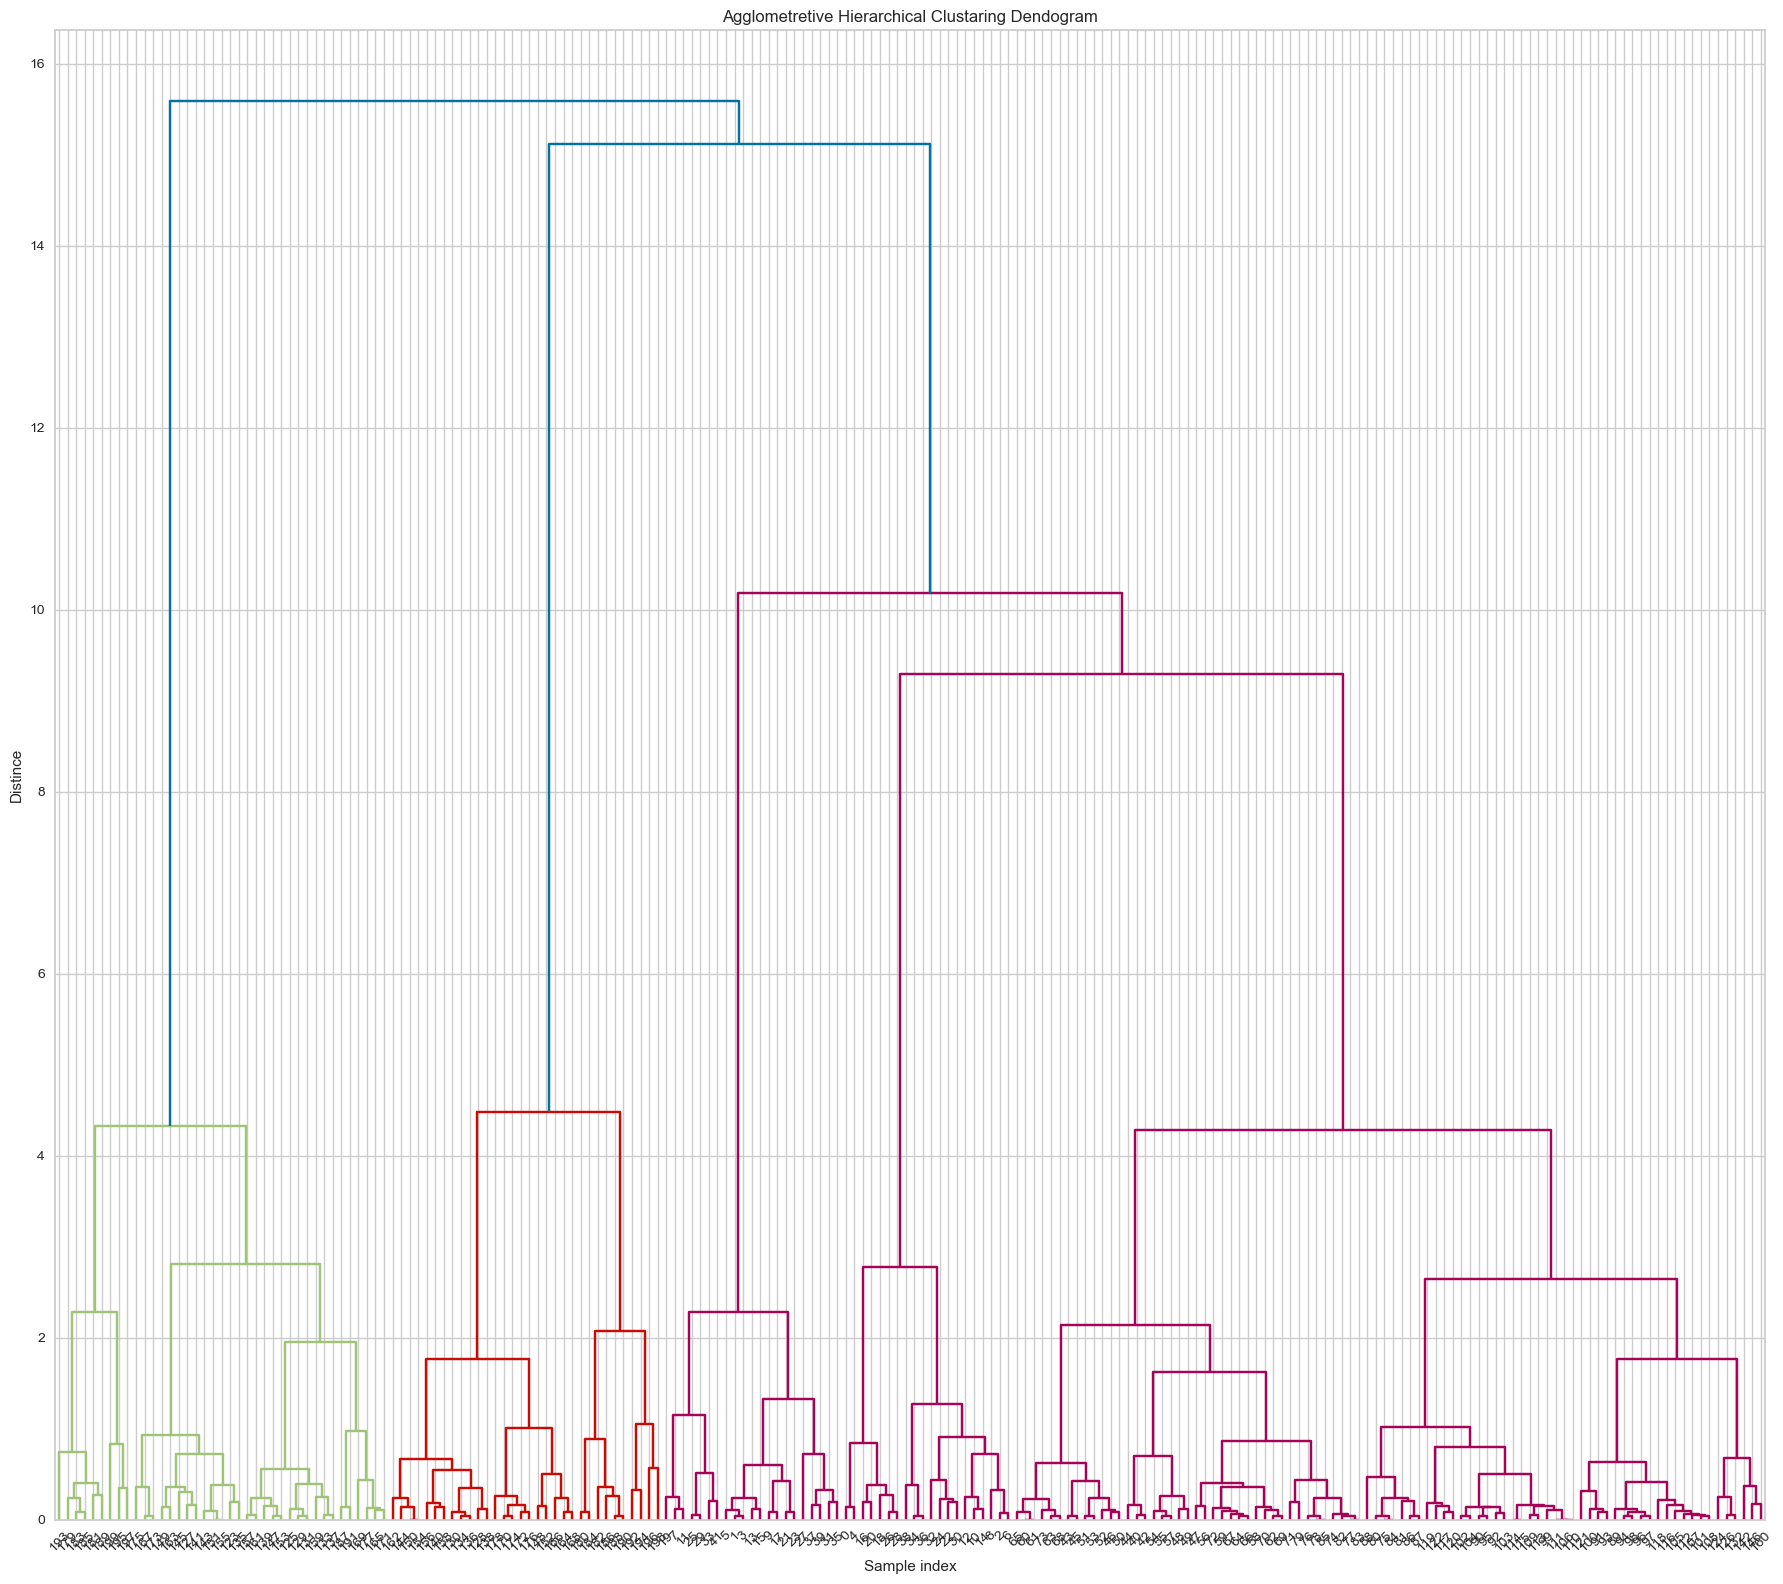

In [60]:
plt.figure(figsize=(18,16))
plt.title('Agglometretive Hierarchical Clustaring Dendogram')
plt.xlabel('Sample index')
plt.ylabel('Distince')
Z=linkage(df_scale,'ward')
dendrogram(Z,leaf_rotation=45.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

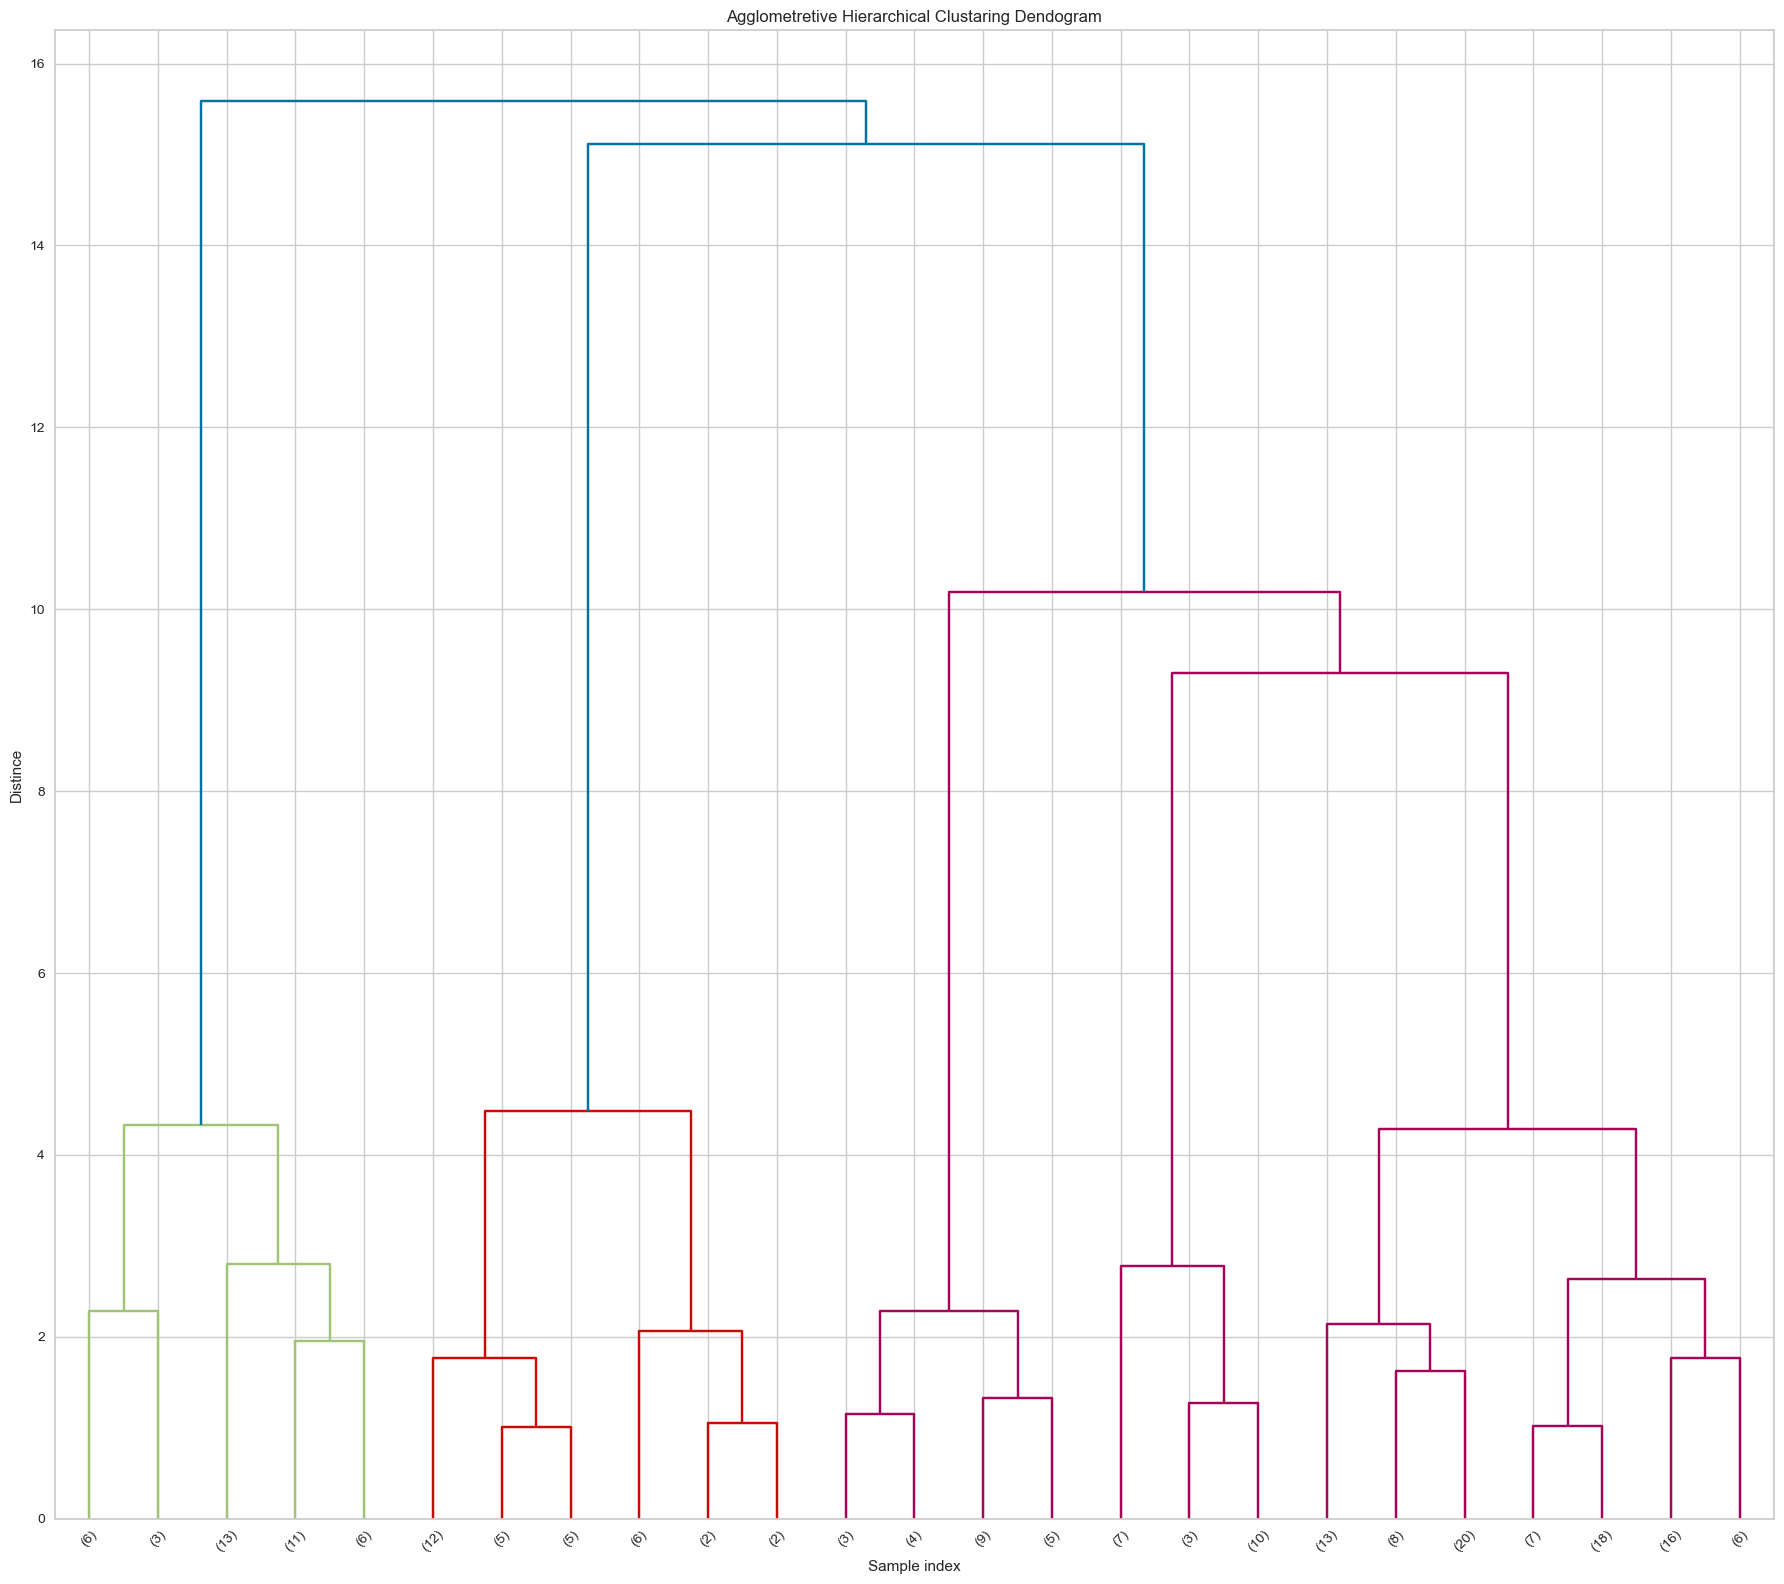

In [61]:
plt.figure(figsize=(18,16))
plt.title('Agglometretive Hierarchical Clustaring Dendogram')
plt.xlabel('Sample index')
plt.ylabel('Distince')
Z=linkage(df_scale,'ward')
dendrogram(Z,leaf_rotation=45.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

In [62]:
from scipy.cluster.hierarchy import fcluster

In [63]:
# method 1
# it goes and gives the clusters based on the numbers of clusters requasted it cust 
clusters=fcluster(z,3,criterion='maxclust')
clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [64]:
# method 2
# it goes and gives the clusters based on the distance .it cust at a distance of 4 and gives the clusters
clusters=fcluster(z,8,criterion='distance')
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 5, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 2, 1, 2, 1,
       5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

# Cophenetic correlation coefficient

In [65]:
from sklearn.metrics.pairwise import euclidean_distances

In [66]:
eucli_dist=euclidean_distances(df_scale)
dist_array=eucli_dist[np.triu_indices(200,k=1)]
coeff,cophenet_dist=cophenet(z,dist_array)
print(coeff)

0.7180396352621479


# Silhoutte Method

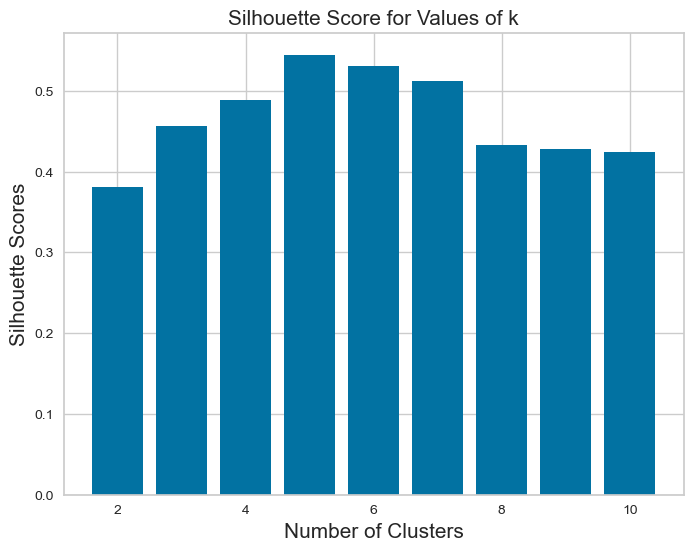

In [67]:
k=[2,3,4,5,6,7,8,9,10]
silhouette_scores=[]
for i in k:
    model=AgglomerativeClustering(n_clusters=i)
    silhouette_scores.append(silhouette_score(df_scale,model.fit_predict(df_scale)))
plt.bar(k,silhouette_scores)
plt.title('Silhouette Score for Values of k',fontsize=15)
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Silhouette Scores',fontsize=15)
plt.show()

# Lest analysis the cluster

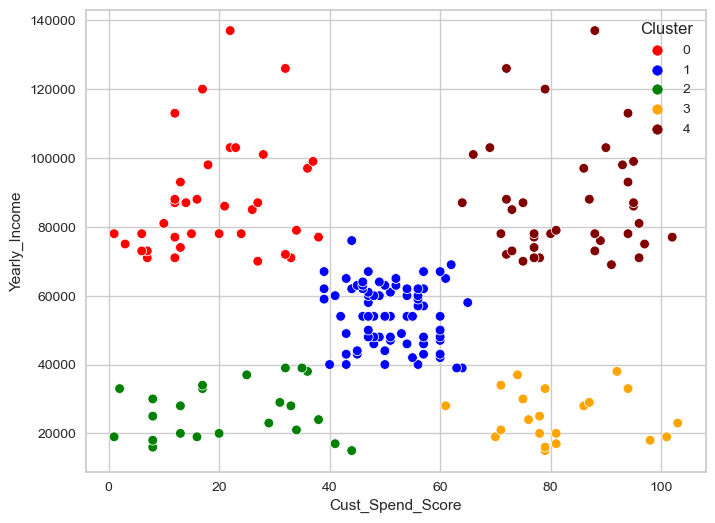

In [68]:
sns.scatterplot(data=df_CustSpend,x='Cust_Spend_Score',y='Yearly_Income',hue='Cluster',palette=['red','blue','green','orange','maroon'])
plt.show()